# Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimage

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Importing Data

In [4]:
data = pd.read_csv('seeds_dataset.txt', sep='\ ', header=None)

e:\python37\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
data

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
feature_name = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove']

In [7]:
x = data.drop([7], axis=1)
y = data[7]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Training Decision Tree

In [10]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualizing Decision Tree

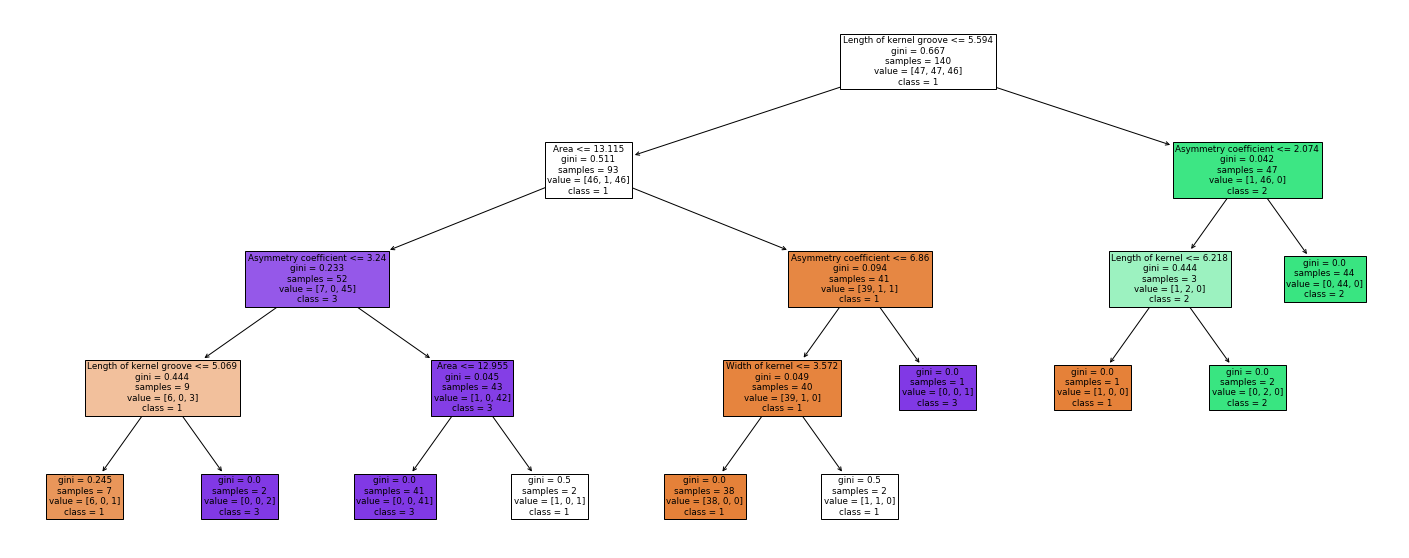

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(classifier, filled=True, feature_names=feature_name, class_names=['1', '2', '3'])
plt.show()

## Visualizing Dataset and Decision Boundaries

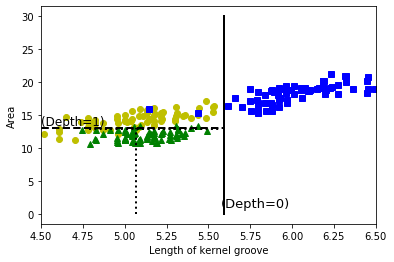

In [13]:
plt.plot(x[6][y==1], x[0][y==1],  "yo", label="1")
plt.plot(x[6][y==2], x[0][y==2], "bs", label="2")
plt.plot(x[6][y==3], x[0][y==3], "g^", label="3")
plt.xlabel("Length of kernel groove")
plt.ylabel("Area")
plt.xlim([4.5, 6.5])
plt.plot([5.594, 5.594], [0, 30], "k-", linewidth=2)
plt.plot([0, 5.594], [13.115, 13.115], "k--", linewidth=2)
plt.plot([5.069, 5.069], [0, 13.115], "k:", linewidth=2)
plt.plot([4.789, 5.576], [12.95, 12.95], "k:", linewidth=2)
plt.text(5.5760, 1.0, "(Depth=0)", fontsize=13)
plt.text(4.5, 13.41, "(Depth=1)", fontsize=12)
plt.show()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[21,  0,  2],
       [ 4, 19,  0],
       [ 4,  0, 20]], dtype=int64)